In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
install.packages("ggplot2")
install.packages("ggthemes")
install.packages("lubridate")
install.packages("tidyr")
install.packages("DT")
install.packages("scales")
install.packages("caret")
install.packages("rpart.plot")


(as ‘lib’ is unspecified)







	‘/tmp/RtmptlLWfi/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmptlLWfi/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmptlLWfi/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmptlLWfi/downloaded_packages’

(as ‘lib’ is unspecified)







































	‘/tmp/RtmptlLWfi/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmptlLWfi/downloaded_packages’

(as ‘lib’ is unspecified)




























































































































	‘/tmp/RtmptlLWfi/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmptlLWfi/downloaded_packages’



In [3]:
%%R
library(ggplot2)                  
library(ggthemes)                              
library(lubridate)
library(dplyr)
library(tidyr)
library(DT)
library(scales)
library(caret)
library(rpart.plot)


https://community.rstudio.com/c/tidyverse

Attaching package: ‘lubridate’



    date, intersect, setdiff, union


Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union






## Details of the above libraries:


*  **Ggplot2** - it is the main part of the project and it is used widely to create aesthetic visualization plots.

*  **Ggthemes** – it is a library for many themes from which the user can get the desired scale for their database.

*  **Lubridate** – it consists of time frames and it should be in separate time categories.

*  **Tidyr** – This function will classify the huge data into many columns and rows which will make it easier to manipulate it.

*  **DT** – This will help in creating an interface between the program and javascript.

*   **Scales**-provides the internal scaling infrastructure used by ggplot2, and gives you tools to override the default breaks, labels, transformations and palettes.





In [4]:
%%R
colors<-c("#FFFF00","#00008B","#FF00FF","#006400","#800080","#00FF00","#FF0000") # (yellow,dark blue,magenta,dark green,purple,lime,red)

In [5]:
%%R 
apr<- read.csv("/content/drive/MyDrive/project/uber-raw-data-apr14.csv")
may<- read.csv("/content/drive/MyDrive/project/uber-raw-data-may14.csv")
jun<- read.csv("/content/drive/MyDrive/project/uber-raw-data-jun14.csv")
jul<- read.csv("/content/drive/MyDrive/project/uber-raw-data-jul14.csv")
aug<- read.csv("/content/drive/MyDrive/project/uber-raw-data-aug14.csv")
sept<- read.csv("/content/drive/MyDrive/project/uber-raw-data-sep14.csv")

In [6]:
%%R
df_14<- rbind(apr,may,jun,jul,aug,sept)
cat("The dimension of the dataset is: ", dim(df_14))

The dimension of the dataset is:  4534327 4

In [7]:
%%R
print("The combined dataset is given by: ")
head(df_14)

[1] "The combined dataset is given by: "
         Date.Time     Lat      Lon   Base
1 4/1/2014 0:11:00 40.7690 -73.9549 B02512
2 4/1/2014 0:17:00 40.7267 -74.0345 B02512
3 4/1/2014 0:21:00 40.7316 -73.9873 B02512
4 4/1/2014 0:28:00 40.7588 -73.9776 B02512
5 4/1/2014 0:33:00 40.7594 -73.9722 B02512
6 4/1/2014 0:33:00 40.7383 -74.0403 B02512


In [8]:
%%R
# Format Date.Time column of data
df_14$Date.Time <- as.POSIXct(df_14$Date.Time, format = "%m/%d/%Y %H:%M:%S")
df_14$Time <- format(as.POSIXct(df_14$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")
df_14$Date.Time <- ymd_hms(df_14$Date.Time)

In [9]:
%%R
# Create a Day column to Data Frame
df_14$day <- factor(day(df_14$Date.Time))
# Create a Month column to Data Frame
df_14$month <- factor(month(df_14$Date.Time, label = TRUE))
# Create a Year column to Data Frame
df_14$year <- factor(year(df_14$Date.Time))
# Create a Day of Week column to Data Frame (Mon, Tues, Wednes., etc)
df_14$dayofweek <- factor(wday(df_14$Date.Time, label = TRUE))
# Format Time column of data
df_14$hour <- factor(hour(hms(df_14$Time)))
df_14$minute <- factor(minute(hms(df_14$Time)))
df_14$second <- factor(second(hms(df_14$Time)))




In [10]:
%%R
# Write new .csv file to R folder
write.csv(df_14,"data_2014.csv", row.names = FALSE)

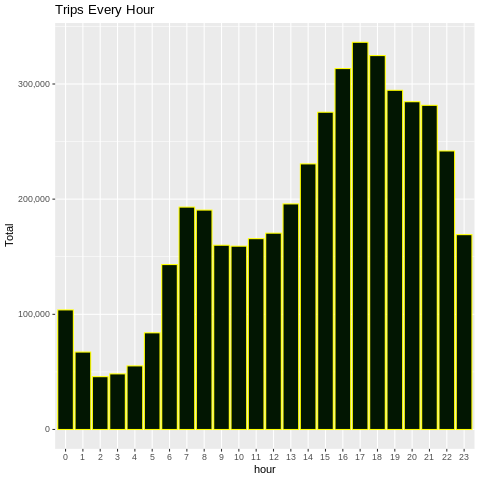

In [11]:
%%R
# Plotting the trips by hours in a day
hour_df <- df_14 %>%
  group_by(hour) %>%
  dplyr::summarize(Total = n()) 
datatable(hour_df)

ggplot(hour_df, aes(hour, Total)) + 
  geom_bar( stat = "identity", fill = "#021602", color = "yellow") +
  ggtitle("Trips Every Hour") +
  theme(legend.position = "none") +
  scale_y_continuous(labels = comma)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


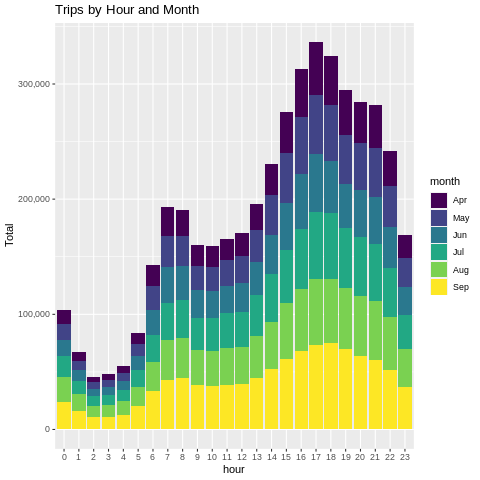

In [12]:
%%R
month_hour <- df_14 %>%
  group_by(month, hour) %>%
  dplyr::summarize(Total = n())

ggplot(month_hour, aes(hour, Total, fill = month)) + 
  geom_bar( stat = "identity") +
  ggtitle("Trips by Hour and Month") +
  scale_y_continuous(labels = comma)

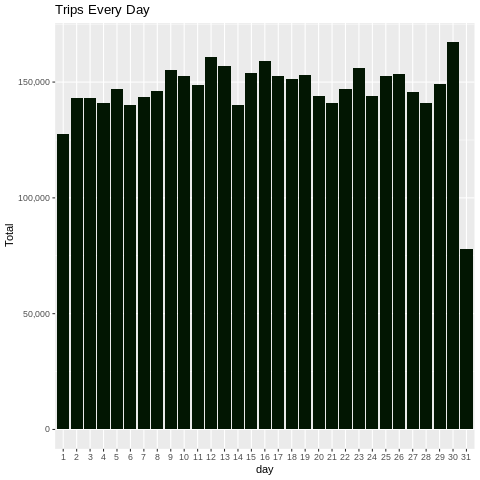

In [13]:
%%R
"Plotting data by trips during every day of the month"
day_group <- df_14 %>%
  group_by(day) %>%
  dplyr::summarize(Total = n()) 
datatable(day_group)

ggplot(day_group, aes(day, Total)) + 
  geom_bar( stat = "identity", fill = "#021602") +
  ggtitle("Trips Every Day") +
  theme(legend.position = "none") +
  scale_y_continuous(labels = comma)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


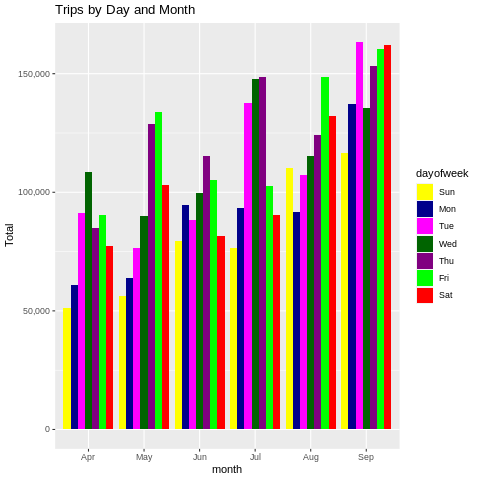

In [14]:
%%R
"Number of Trips taking place during months in a year"
month_weekday <- df_14 %>%
  group_by(month, dayofweek) %>%
  dplyr::summarize(Total = n())

ggplot(month_weekday, aes(month, Total, fill = dayofweek)) + 
  geom_bar( stat = "identity", position = "dodge") +
  ggtitle("Trips by Day and Month") +
  scale_y_continuous(labels = comma) +
  scale_fill_manual(values = colors)

## Number of Trips taking place during months in a year

In [15]:
%%R
month_group <- df_14 %>%
  group_by(month) %>%
  dplyr::summarize(Total = n())

datatable(month_group)

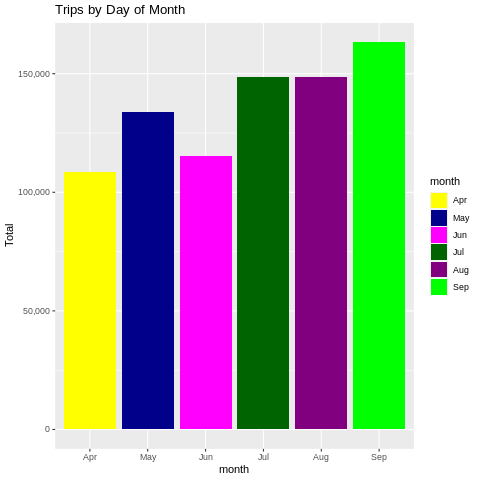

In [16]:
%%R

ggplot(month_weekday, aes(month, Total, fill = month)) + 
  geom_bar( stat = "identity", position = "dodge") +
  ggtitle("Trips by Day of Month") +
  scale_y_continuous(labels = comma) +
  scale_fill_manual(values = colors)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


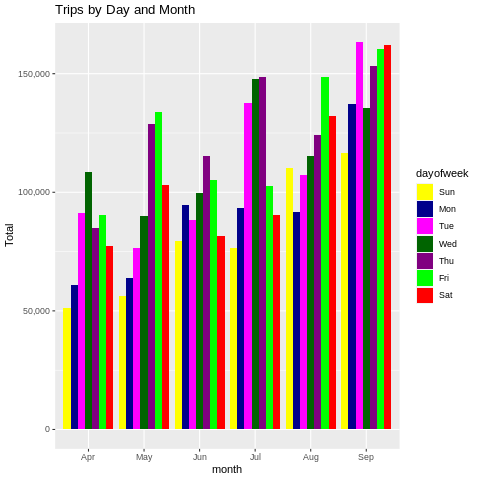

In [17]:
%%R
month_weekday <- df_14 %>%
         group_by(month, dayofweek) %>%
             dplyr::summarize(Total = n())
ggplot(month_weekday, aes(month, Total, fill = dayofweek)) + 
       geom_bar( stat = "identity", position = "dodge") +
          ggtitle("Trips by Day and Month") +
           scale_y_continuous(labels = comma) +
           scale_fill_manual(values = colors)

## Finding out the number of Trips by bases

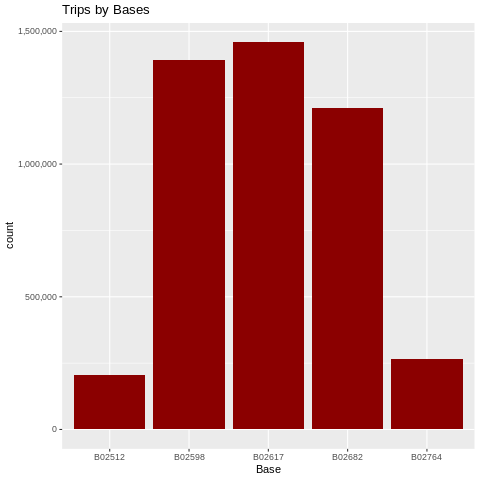

In [18]:
%%R
ggplot(df_14, aes(Base)) + 
 geom_bar(fill = "darkred") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases")

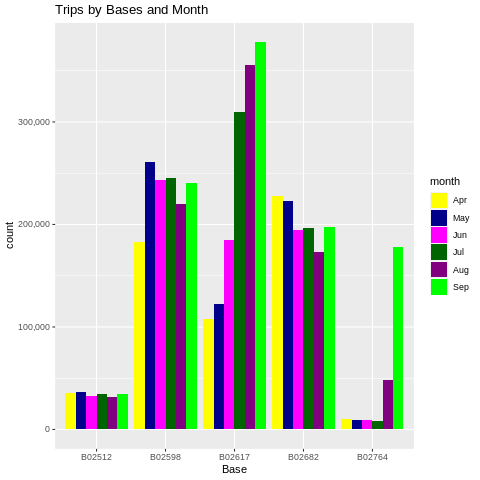

In [19]:
%%R
ggplot(df_14, aes(Base, fill = month)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and Month") +
 scale_fill_manual(values = colors)

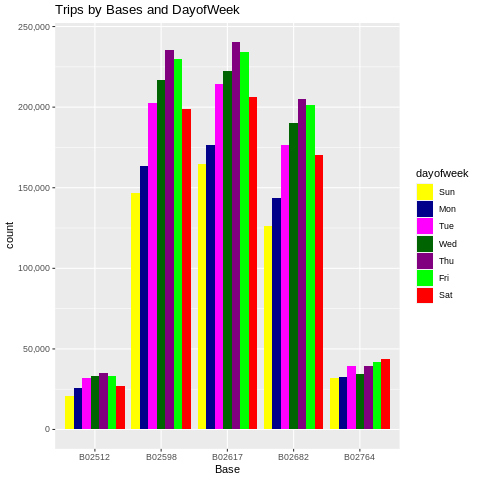

In [20]:
%%R
ggplot(df_14, aes(Base, fill = dayofweek)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and DayofWeek") +
 scale_fill_manual(values = colors)

##  Heatmap by Hour and Day.

In [21]:
%%R
day_and_hour <- df_14 %>%
         group_by(day, hour) %>%
            dplyr::summarize(Total = n())
datatable(day_and_hour)

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


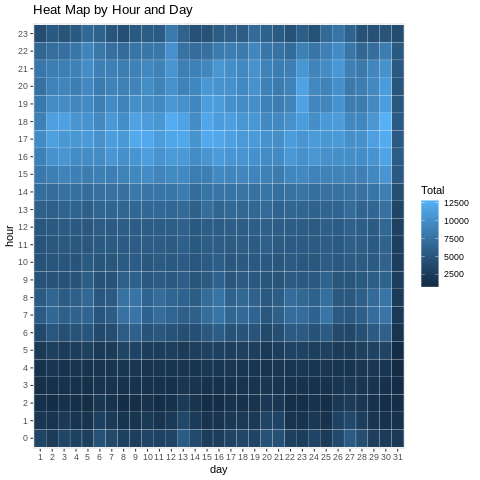

In [22]:
%%R
ggplot(day_and_hour, aes(day, hour, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Hour and Day")

## Heatmap by Month and Day.


In [23]:
%%R
day_month_group <- df_14 %>%
         group_by(day, month) %>%
            dplyr::summarize(Total = n())
datatable(day_month_group)

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


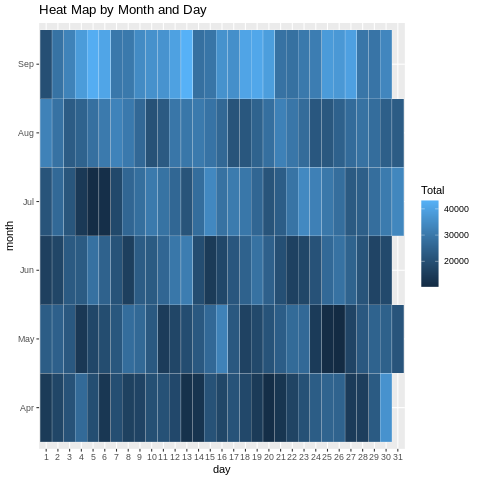

In [24]:
%%R
ggplot(day_month_group, aes(day, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day")

##  Heatmap by Month and Day of the Week.


In [25]:
%%R
month_weekday <- df_14 %>%
         group_by(dayofweek, month) %>%
            dplyr::summarize(Total = n())
datatable(month_weekday)

`summarise()` has grouped output by 'dayofweek'. You can override using the
`.groups` argument.


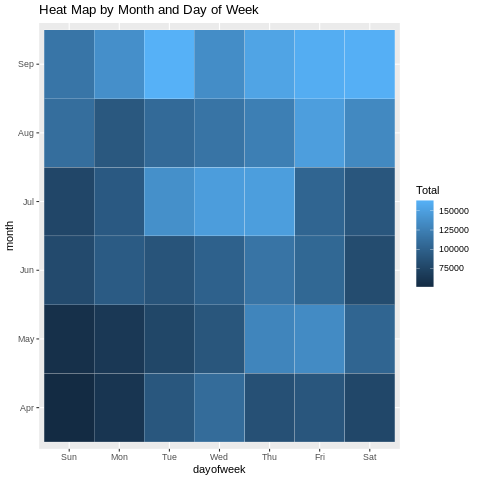

In [26]:
%%R
ggplot(month_weekday, aes(dayofweek, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day of Week")

## Heatmap that delineates Month and Bases.


`summarise()` has grouped output by 'Base'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Base'. You can override using the
`.groups` argument.


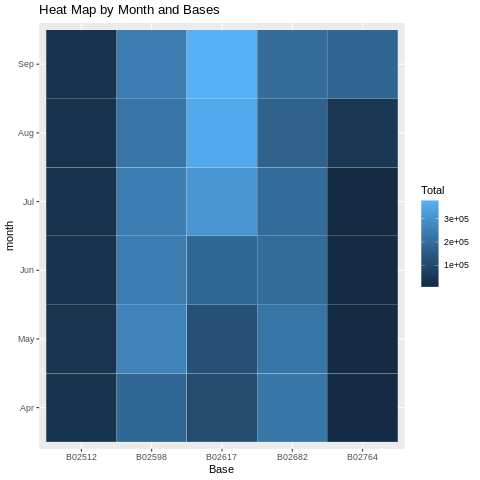

In [27]:
%%R
month_base <-  df_14 %>%
                    group_by(Base, month) %>%
                        dplyr::summarize(Total = n()) 
day0fweek_bases <-  df_14 %>%
                    group_by(Base, dayofweek) %>%
                        dplyr::summarize(Total = n()) 
ggplot(month_base, aes(Base, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Bases")

## Heatmap by bases and day of the week.

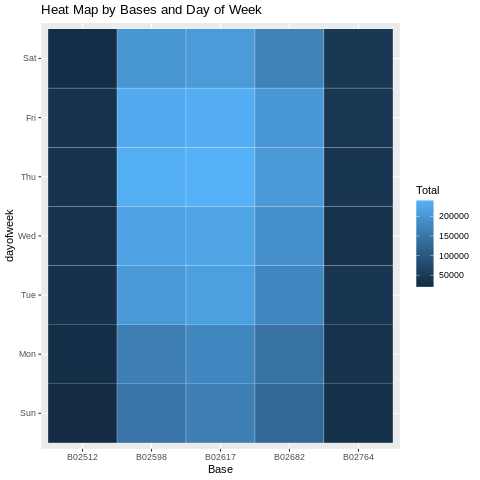

In [28]:
%%R
ggplot(day0fweek_bases, aes(Base, dayofweek, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Bases and Day of Week")

## Creating a map visualization of rides in New York

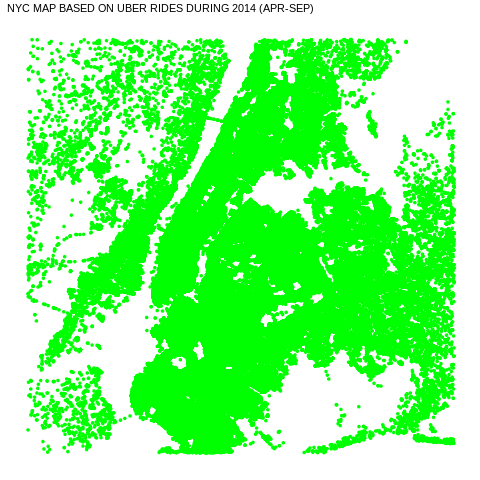

In [29]:
%%R
min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.15
max_long <- -73.7004
ggplot(df_14, aes(x=Lon, y=Lat)) +
  geom_point(size=1, color = "Green") +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
        theme_map() +
           ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP)")


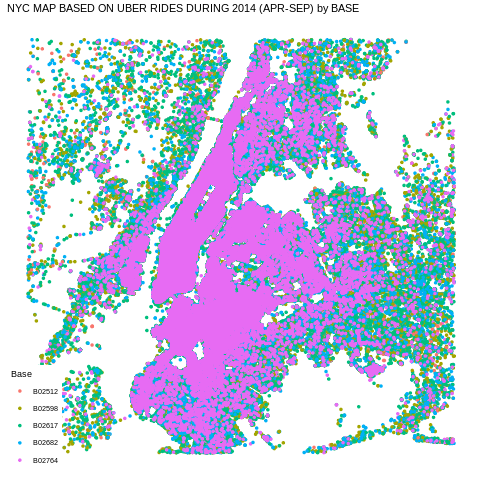

In [30]:
%%R
ggplot(df_14, aes(x=Lon, y=Lat, color = Base)) +
  geom_point(size=1) +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
       theme_map() +
          ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE")